In [1]:
import sys
sys.path.append("..")

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from src.feature_importance import forestFit, LinearRegressionFit, impurityPlot, permutationPlot

## Read in Cohort of Significance(CoS)

In [2]:
df_cos=pd.read_csv("../data/cos_pca_dbscan_v2.csv")
df_cos = df_cos.drop(columns =["PC1","PC2"])

df_lab = pd.read_csv("../data/cohort_labels_v2.csv")
df_features = pd.read_csv("../data/cohort_features_v2.csv")

#label of cos
labels = pd.merge(left=df_cos, right=df_lab, on="ID")
labels = labels["sum_los"]

#features of cos
features = pd.merge(left=df_cos, right=df_features, on="ID")



### To use random forest as model, divide numeric labels into 4 bins based on the values

In [3]:
mean_icuStay_75 = labels.quantile(0.75)
mean_icuStay_50 = labels.quantile(0.50)
mean_icuStay_25 = labels.quantile(0.25)
print("1/4 2/4 3/4 quantile of icuStay length: ", mean_icuStay_25,mean_icuStay_50, mean_icuStay_75 )
y_bins = [] 
for label in labels:
    if label > mean_icuStay_75:
        y_bins.append(3)
    elif label > mean_icuStay_50:
        y_bins.append(2)
    elif label > mean_icuStay_25:
        y_bins.append(1)
    else:
        y_bins.append(0)
y = labels

1/4 2/4 3/4 quantile of icuStay length:  4.685868055555556 6.893275462962964 11.90140625


In [4]:
''' 
Experiments: if drop features that appear to be unimportant in the folloing feature importance analysis
Result: Turned out to be not much different, the model prediction increses
'''
X = features.drop(columns=["ID", "admission_type_direct_emer","admission_type_direct_observation","admission_type_elective","admission_type_eu_observation","admission_type_ew_emer","admission_type_observation_admit","admission_type_surgical_same_day_admission","admission_type_urgent","ventilation_status_highflow","ventilation_status_invasivevent","ventilation_status_noninvasivevent","ventilation_status_oxygen","ventilation_status_trach","gender_m","dopamine","epinephrine","norepinephrine","phenylephrine","vasopressin","dobutamine","milrinone","albumin","bilirubin","abps"])

'''
All features
'''
# X = features.drop(columns=["ID"])

'''
Experiments: if drop the aggregate features
'''
# X = features.drop(columns=["ID", "gcs_min", "sofa", "n_stays", "suspected_infection"])
X.head()

,n_stays,anchor_age,suspected_infection,weight,height_chart,heart_rate_min,heart_rate_max,temperature_min,temperature_max,nbpm_min,...,magnesium_max,ph_min,ph_max,pco2_min,pco2_max,po2_min,po2_max,gcs_min,sofa,urineoutput
0,2,80,1,43.00,150.0,93.0,120.0,98.5,101.1,34.0,...,2.2,7.26,7.44,40.0,70.0,50.0,106.0,4.0,10,38.333333
1,1,78,1,66.95,175.0,59.0,141.0,97.6,98.7,55.0,...,2.8,7.33,7.47,37.0,46.0,170.0,473.0,8.0,5,141.111111
2,1,51,1,111.65,180.0,82.0,107.0,98.5,101.3,65.0,...,2.2,7.43,7.43,38.0,38.0,100.0,100.0,11.0,7,278.846154
3,2,54,0,91.15,117.0,67.0,91.0,98.0,98.4,58.0,...,2.2,7.35,7.35,40.0,40.0,55.0,55.0,14.0,5,46.304348
4,2,60,1,123.70,183.0,62.0,91.0,97.7,99.3,64.0,...,2.2,7.32,7.32,42.0,42.0,24.0,24.0,15.0,6,238.181818


### Feature Importance Analysis using Random Forest

In [5]:
feature_names_RF, forest_RF, X_test_RF, y_test_RF = forestFit(X,y_bins)

0.4154838709677419

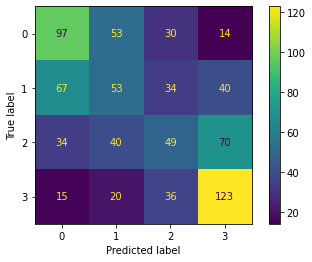

In [6]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

plot_confusion_matrix(estimator =forest_RF, X = X_test_RF, y_true = y_test_RF )
y_pred = forest_RF.predict(X_test_RF)
accuracy_score(y_test_RF, y_pred)

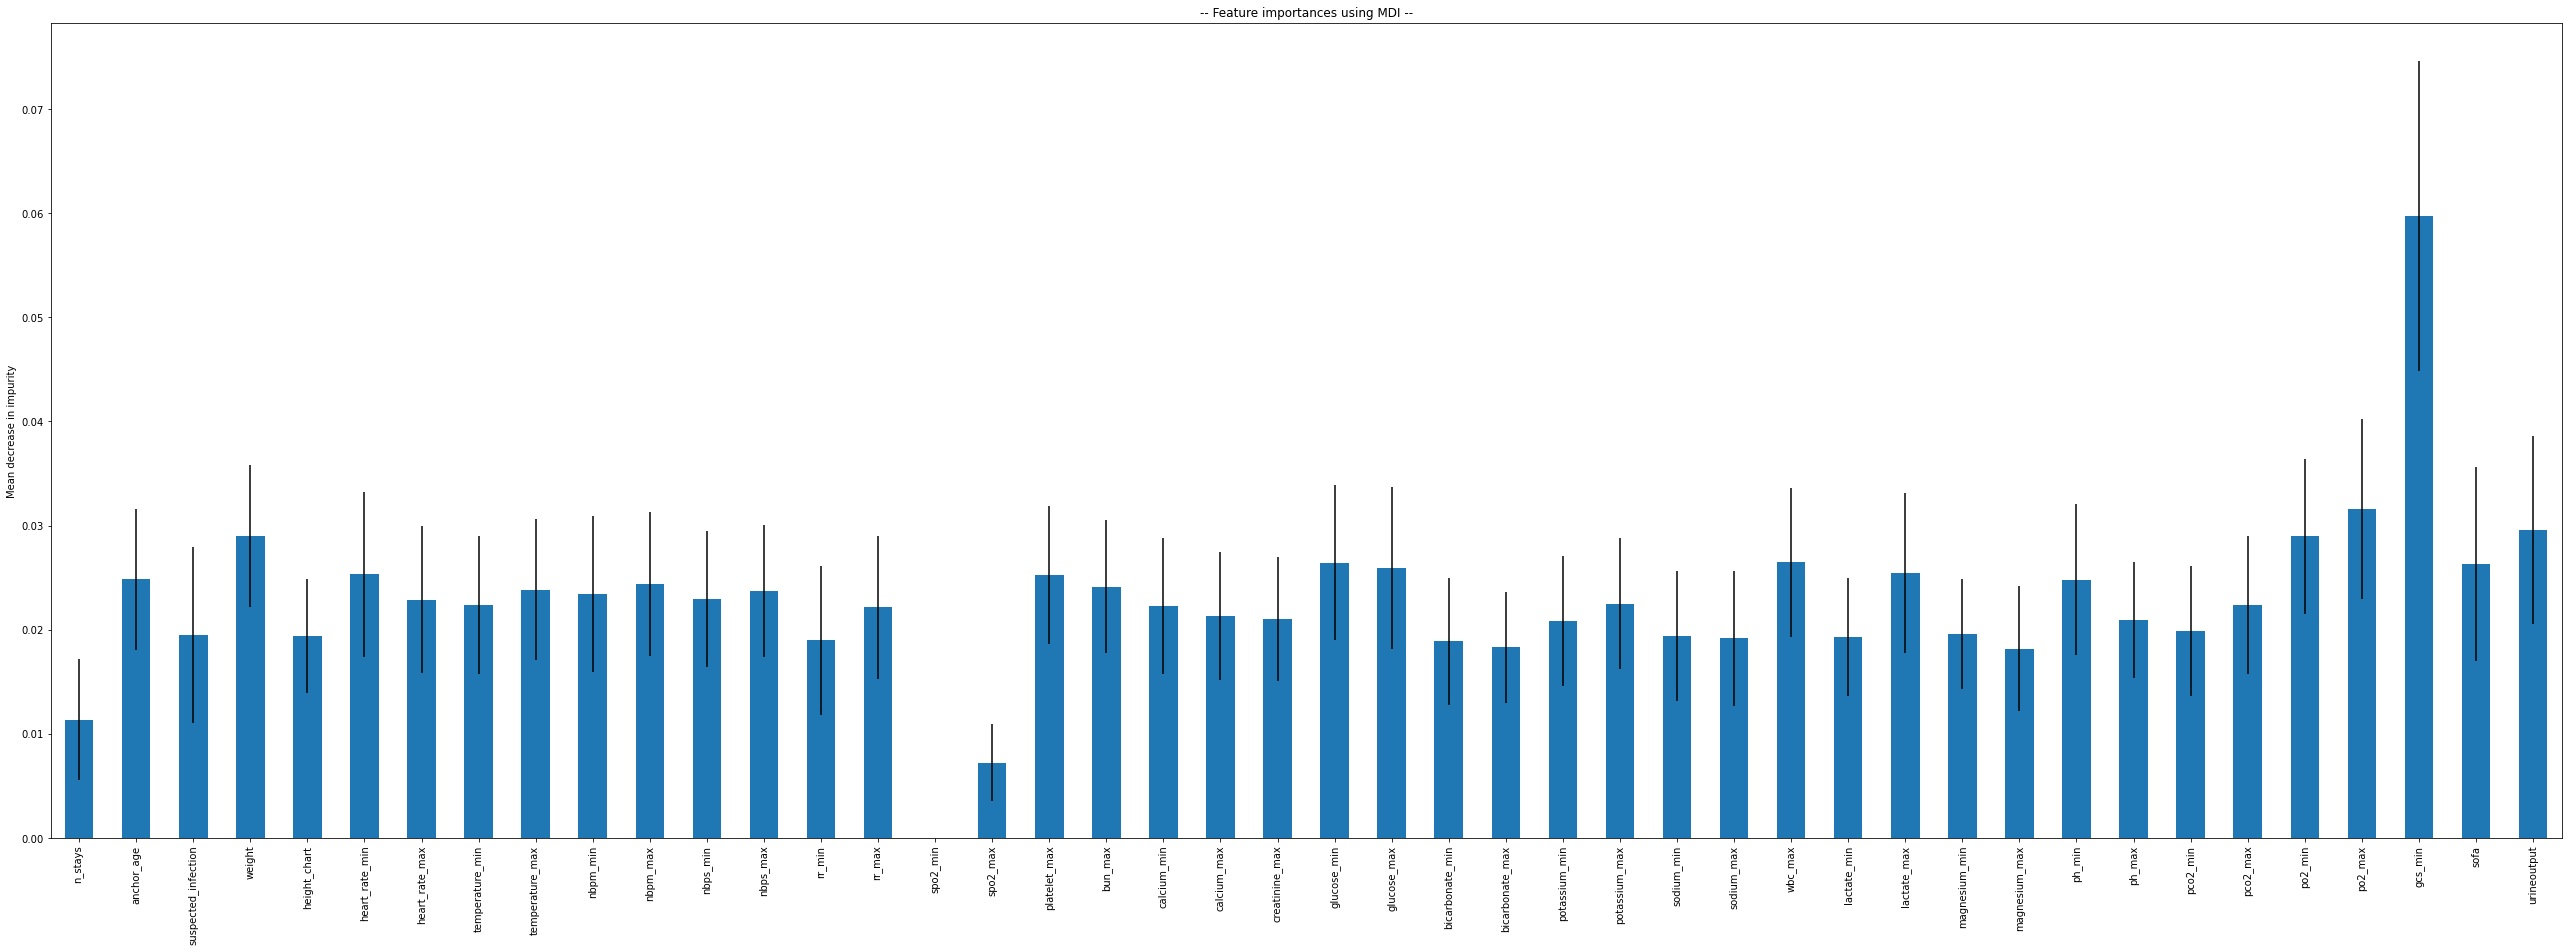

In [7]:
impurityPlot(feature_names_RF,forest_RF)

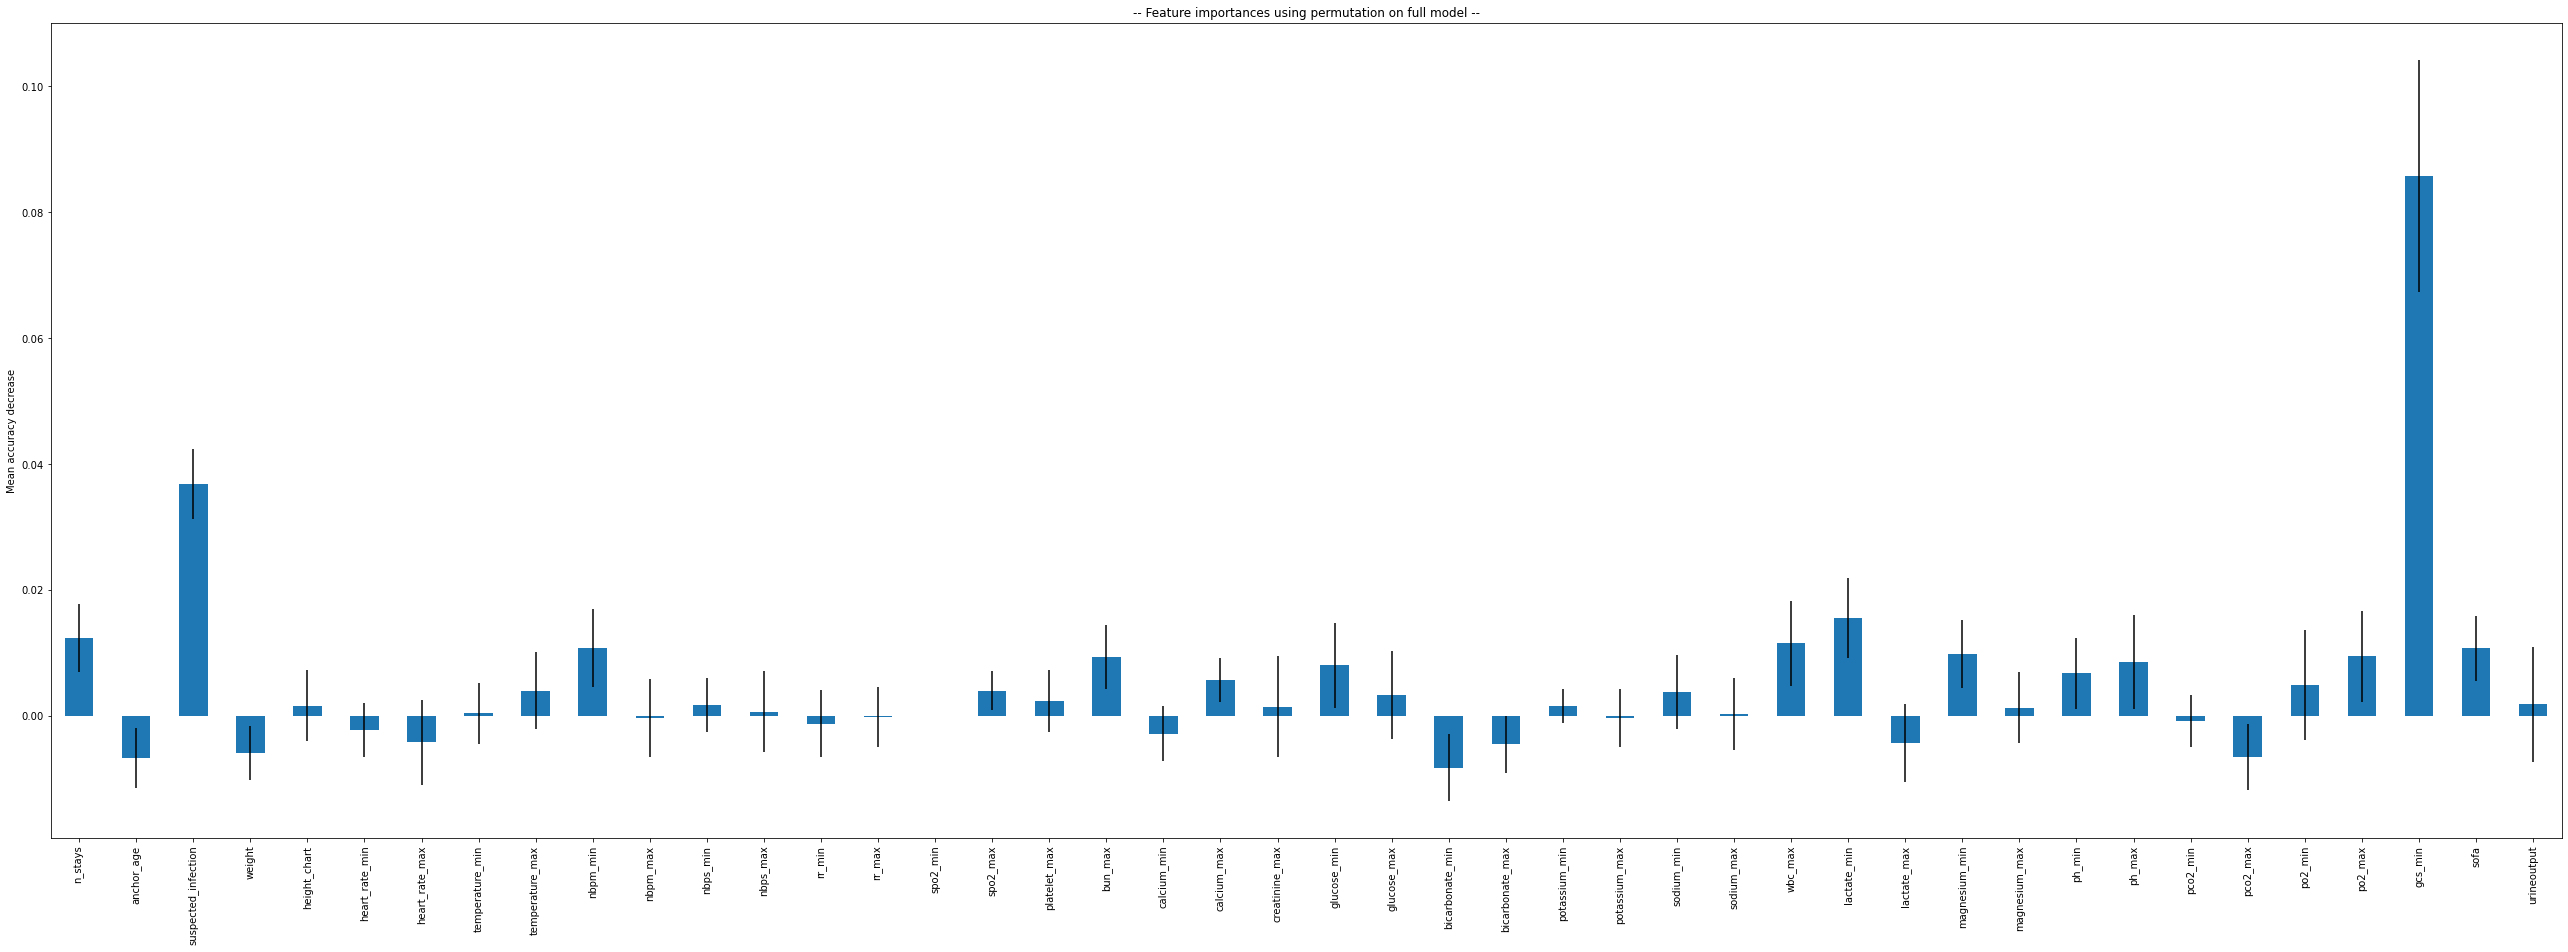

In [9]:
permutationPlot(feature_names_RF,forest_RF, X_test_RF, y_test_RF)

### Feature Importance Analysis using Linear Regression

In [10]:
feature_names_LR, model_LR, X_test_LR, y_test_LR = LinearRegressionFit(X,y)

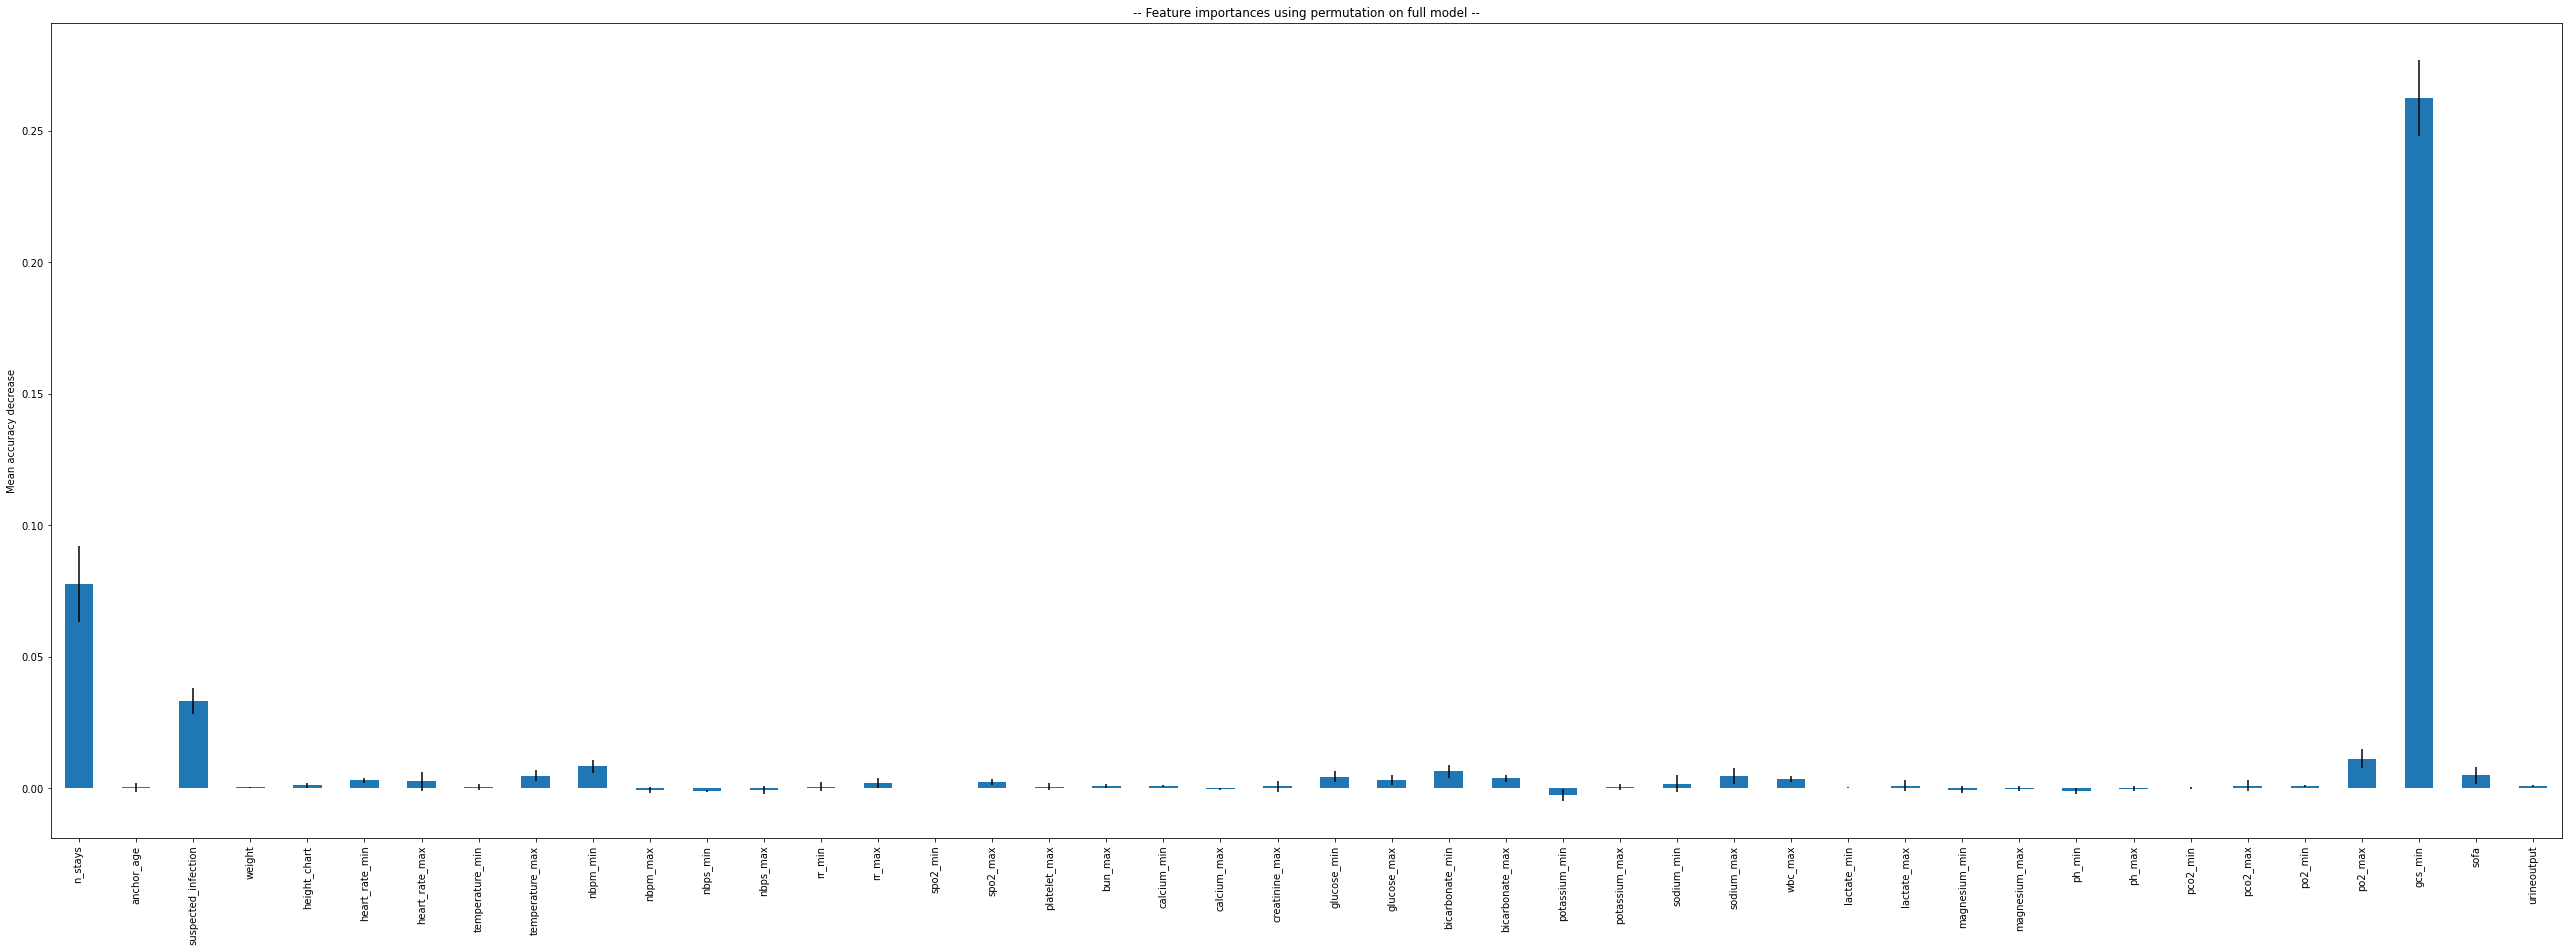

In [11]:
permutationPlot(feature_names_LR,model_LR, X_test_LR, y_test_LR)